# Вариант 6. Задачи № 3.1.6, 3.4, 3.10.2

## №3.1.6

## Дана система уравнений Ax=b порядка n. Исследовать зависимость погрешности решения x от погрешностей правой части системы b.
## n = 7
## aij = 3 / ( c^4 - 4 * c^3 )
## bi = N, N = 1...n
## c = cij = 0.1 * N * i * j, i,j = 1,..n

In [68]:
import numpy as np
N = 7

A = np.empty((N,N))
    
for i in range (1, N+1 ):
    for j in range(1, N+1 ):
        A[i-1][j-1] = 3 / ( ( 0.1 * 6 * i * j)**4 - 4 * ( 0.1 * 6 * i * j)**3 )

In [69]:
print(A)

[[-4.08496732e+00 -6.20039683e-01 -2.33819678e-01 -1.35633681e-01
  -1.11111111e-01 -1.60751029e-01  2.02461937e-01]
 [-6.20039683e-01 -1.35633681e-01 -1.60751029e-01  3.39084201e-02
   6.94444444e-03  2.51173483e-03  1.15035192e-03]
 [-2.33819678e-01 -1.60751029e-01  1.36085527e-02  2.51173483e-03
   8.23045267e-04  3.50220106e-04  1.74385820e-04]
 [-1.35633681e-01  3.39084201e-02  2.51173483e-03  6.05507502e-04
   2.17013889e-04  9.66051856e-05  4.94291839e-05]
 [-1.11111111e-01  6.94444444e-03  8.23045267e-04  2.17013889e-04
   8.08080808e-05  3.67430923e-05  1.90552411e-05]
 [-1.60751029e-01  2.51173483e-03  3.50220106e-04  9.66051856e-05
   3.67430923e-05  1.69140392e-05  8.84267720e-06]
 [ 2.02461937e-01  1.15035192e-03  1.74385820e-04  4.94291839e-05
   1.90552411e-05  8.84267720e-06  4.64777983e-06]]


In [14]:
b = np.full(N, fill_value = 6, dtype = float)
print(b)

[6. 6. 6. 6. 6. 6. 6.]


In [15]:
x = np.linalg.solve(A, b)

In [16]:
print(x)

[ 4.22830737e+00  8.63582825e+02  1.16140840e+05  5.36275970e+06
 -5.13172315e+07  6.46491798e+07  2.68968736e+07]


In [17]:
cond_A = np.linalg.cond(A, np.inf)
print(cond_A)

198429344.26953742


In [18]:
np.linalg.cond(A, -np.inf)

0.8050184594721081

In [19]:
np.linalg.cond(A)

119587319.47307883

In [22]:
d = 0.1
xi = np.empty((N,N))
for i in range(N):
    b_modified = b.copy()
    b_modified[i] += d
    xi[i] = np.linalg.solve(A, b_modified)
    
print(xi)

d_vec = []
for i in range (N):
    d_vec.append( np.linalg.norm(x - xi[i], ord = np.inf) / np.linalg.norm(x, ord = np.inf) )

[[ 4.22830736e+00  8.63582825e+02  1.16140840e+05  5.36275969e+06
  -5.13172314e+07  6.46491795e+07  2.68968739e+07]
 [ 4.22830723e+00  8.63582655e+02  1.16140675e+05  5.36276520e+06
  -5.13172592e+07  6.46492068e+07  2.68968834e+07]
 [ 4.22826602e+00  8.63418450e+02  1.16152155e+05  5.36309123e+06
  -5.13198964e+07  6.46522377e+07  2.68980737e+07]
 [ 4.22449986e+00  8.69087139e+02  1.16472378e+05  5.37544773e+06
  -5.14287796e+07  6.47830833e+07  2.69508725e+07]
 [ 4.30481954e+00  8.35930425e+02  1.13475921e+05  5.25121159e+06
  -5.02983371e+07  6.33998799e+07  2.63862325e+07]
 [ 3.92980797e+00  8.90553123e+02  1.19198703e+05  5.49666314e+06
  -5.25665314e+07  6.61999769e+07  2.75358748e+07]
 [ 4.52461536e+00  8.73318207e+02  1.17340887e+05  5.41675861e+06
  -5.18278726e+07  6.52881811e+07  2.71615857e+07]]


In [23]:
d_vec

[4.617219096681575e-09,
 4.277301054327098e-07,
 4.729932970029347e-05,
 0.0020712318822528274,
 0.019324296252936787,
 0.023987884057414612,
 0.009884135088179239]

In [24]:
import matplotlib.pyplot as plt

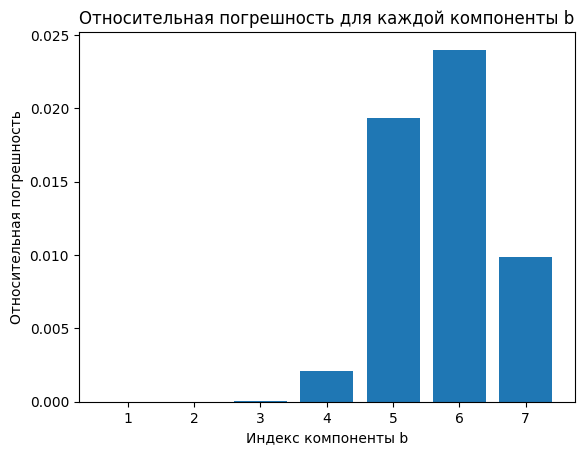

Компонента b6 оказывает наибольшее влияние на погрешность решения.


In [25]:
plt.bar(range(1, N + 1), d_vec)
plt.xlabel('Индекс компоненты b')
plt.ylabel('Относительная погрешность')
plt.title('Относительная погрешность для каждой компоненты b')
plt.show()

# Определение компоненты b_m с наибольшим влиянием на погрешность
max_index = np.argmax(d_vec)
print(f'Компонента b{max_index + 1} оказывает наибольшее влияние на погрешность решения.')

In [26]:
b_changed = b.copy()
b_changed[5] += d
print(b_changed)

[6.  6.  6.  6.  6.  6.1 6. ]


In [27]:
b_delta = (np.linalg.norm( b - b_changed, ord=np.inf) / np.linalg.norm(b, ord=np.inf))

In [30]:
print(f"Теоретическая погрешность решения x^m: {b_delta * cond_A}")

Теоретическая погрешность решения x^m: 3307155.737825612


In [29]:
print(f"Практическая погрешность: {np.max(d_vec)}")

Практическая погрешность: 0.023987884057414612


### delta(x^m) << cond(A) * delta(b^m)
### 0.023987884057414612 << 3307155.737825612

## Практическая погрешность значительно меньше чем теоретическая погрешность. Это объясняется тем, что сам по себе изложенный метод гаусса обладает достаточно высокой точностью.

## №3.4
### Решить систему уравнений Ax=b из задачи 3.1, используя LU-разложение матрицы A.
### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
### 1. Составить функцию lu(A), и с ее помощью получить LU- разложение матрицы A.
### 2. Преобразовать вектор b по формулам прямого хода метода Гаусса. С помощью обратной подстановки найти решение системы x.
### УКАЗАНИЕ. Функция lu(A) должна возвращать матрицу, в которой содержатся матрицы P, L и U такие, что PA=LU (P- матрица перестановок).

In [75]:
from scipy.linalg import lu

In [80]:
def lu(A):

    n = A.shape[0]
    P = np.eye(n)
    L = np.eye(n)
    U = A.copy()

    for k in range(n - 1):
        pivot_row = np.argmax(np.abs(U[k:, k])) + k

        P[[k, pivot_row], :] = P[[pivot_row, k], :]
        U[[k, pivot_row], :] = U[[pivot_row, k], :]

        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]
            L[i, k] = factor
            U[i, k:] -= factor * U[k, k:]

    return P, L, U

In [81]:
P, L, U = lu(A)

In [82]:
P*A 

array([[-4.08496732e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -1.60751029e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00, -1.60751029e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.05507502e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.90552411e-05],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.67430923e-05,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.84267720e-06,
         0.0000000

In [83]:
L * U

array([[-4.08496732e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -1.25260542e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.34207723e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         1.79612211e-02,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00, -7.04842493e-04, -0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -1.30242352e-18, -0.00000000e+00, -9.97892230e-06,
         0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         1.5649422

In [85]:
def solve_lu(A, b):
    y = np.linalg.solve(L, P @ b)

    x = np.linalg.solve(U, y)

    return x

In [89]:
print(f"Решение системы используя LU-разложение матрицы A, x = {solve_lu(A,b)}")

Решение системы используя LU-разложение матрицы A, x = [-5.82159874e+01  2.91730386e+03  3.36434484e+05  1.48347163e+07
 -1.38876078e+08  1.72733944e+08  7.12667941e+07]


## №3.10.2
### Дана система уравнений Ax=b порядка n=35 с разреженной матрицей A. 

### На главной диагонали элементы равны 100, на 1, 2 и 3 наддиагоналях элементы равны 1, на 1 поддиагонали элементы равны 1.

### Решить систему методом прогонки.

##### УКАЗАНИЕ. Предусмотреть компактное размещение элементов матрицы в памяти ЭВМ.

In [3]:
import numpy as np
n = 35

# Создание разреженной матрицы A и вектора b
A = np.zeros((n, n))
b = np.zeros(n)

In [137]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
for i in range(n):
    b[i] = (i + 1) * np.exp(22 / (i + 1)) * np.sin(9 / (i + 1))

In [4]:
for i in range(n):
    A[i, i] = 100  # Главная диагональ
    if i < n - 1:
        A[i, i + 1] = 1  # Наддиагональ 1
        A[i + 1, i] = 1  # Поддиагональ -1
    if i < n - 2:
        A[i, i + 2] = 1  # Наддиагональ 2
    if i < n - 3:
        A[i, i + 3] = 1  # Наддиагональ 3

In [140]:
A

array([[100.,   1.,   1., ...,   0.,   0.,   0.],
       [  1., 100.,   1., ...,   0.,   0.,   0.],
       [  0.,   1., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100.,   1.,   1.],
       [  0.,   0.,   0., ...,   1., 100.,   1.],
       [  0.,   0.,   0., ...,   0.,   1., 100.]])

In [141]:
A[0][3]

1.0

### Метод прогонки для пятидиагональной матрицы состоящий из прямой прогонки и обратной прогонки.

In [10]:
def pentadiagonal_solver(A, b):
    n = len(b)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    x = np.zeros(n)

    alpha[1] = -A[0][1] / A[0][0]
    beta[1] = b[0] / A[0][0]

    for i in range(1, n - 1):
        denominator = A[i][i] + A[i][i-1] * alpha[i]
        alpha[i+1] = -A[i][i+1] / denominator
        beta[i+1] = (b[i] - A[i][i-1] * beta[i]) / denominator

    x[-1] = (b[-1] - A[-1][-2] * beta[-1]) / (A[-1][-1] + A[-1][-2] * alpha[-1])

    for i in range(n - 2, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + beta[i+1]

    return x

In [11]:
x = pentadiagonal_solver(A, b)
print("Решение системы уравнений:")
for i in range(n):
    print(x[i], "\n")

Решение системы уравнений:
14775577.931859845 

-148941.31451858734 

1495.9664069793603 

-7.38430490827988 

4.017019806646161 

2.286001655415065 

1.5225225978747674 

1.1053342428818647 

0.8547717981328179 

0.692592639375801 

0.5813236028675882 

0.5013825629886983 

0.44177931259833897 

0.3959719025391307 

0.35987075889429354 

0.3308117947654574 

0.30699761053796343 

0.28717845864879543 

0.27046238754972124 

0.25619810793976655 

0.24390040176704408 

0.2332012757288847 

0.22381716868947088 

0.2155264418914653 

0.20815361568053115 

0.2015581295869702 

0.19562619534547795 

0.19026480290622846 

0.18539724980766165 

0.18095976466713548 

0.1768989274083324 

0.17316967535857747 

0.16973391864161771 

0.16654240493633013 

0.1652248071969966 

